In [16]:
#202331192 MUHAMAD FAUZI AKBAR PCD F

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
img = cv2.imread('buah.jpg')
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [3]:
hue = img_hsv[:, :, 0]
sat = img_hsv[:, :, 1]
val = img_hsv[:, :, 2]

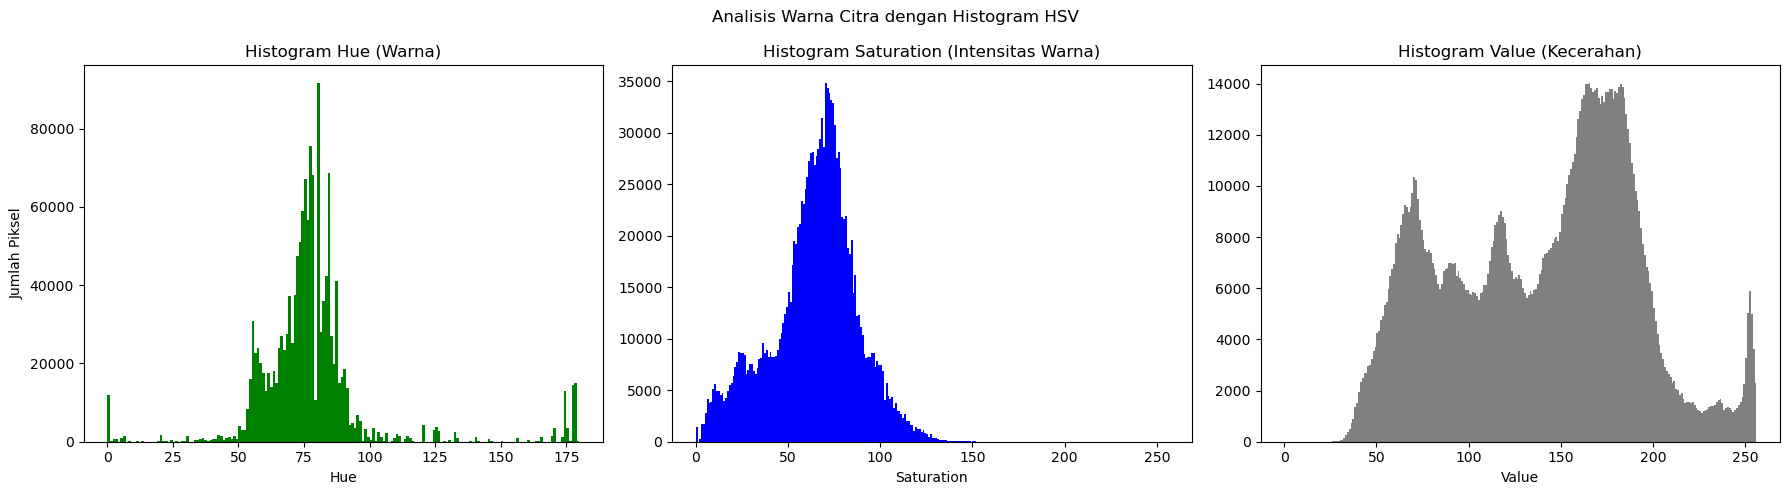

In [4]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(hue.ravel(), bins=180, range=(0, 180), color='green')
axes[0].set_title("Histogram Hue (Warna)")
axes[0].set_xlabel("Hue")
axes[0].set_ylabel("Jumlah Piksel")

axes[1].hist(sat.ravel(), bins=256, range=(0, 256), color='blue')
axes[1].set_title("Histogram Saturation (Intensitas Warna)")
axes[1].set_xlabel("Saturation")

axes[2].hist(val.ravel(), bins=256, range=(0, 256), color='gray')
axes[2].set_title("Histogram Value (Kecerahan)")
axes[2].set_xlabel("Value")

plt.suptitle("Analisis Warna Citra dengan Histogram HSV")
plt.tight_layout()
plt.show()

In [5]:
lower_green = np.array([35, 40, 40])
upper_green = np.array([85, 255, 255])

In [6]:
mask_daun = cv2.inRange(img_hsv, lower_green, upper_green)
segmentasi_daun = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_daun)

# Segmentasi Non-Daun (buah, batang)
mask_non_daun = cv2.bitwise_not(mask_daun)
segmentasi_non_daun = cv2.bitwise_and(img_rgb, img_rgb, mask=mask_non_daun)

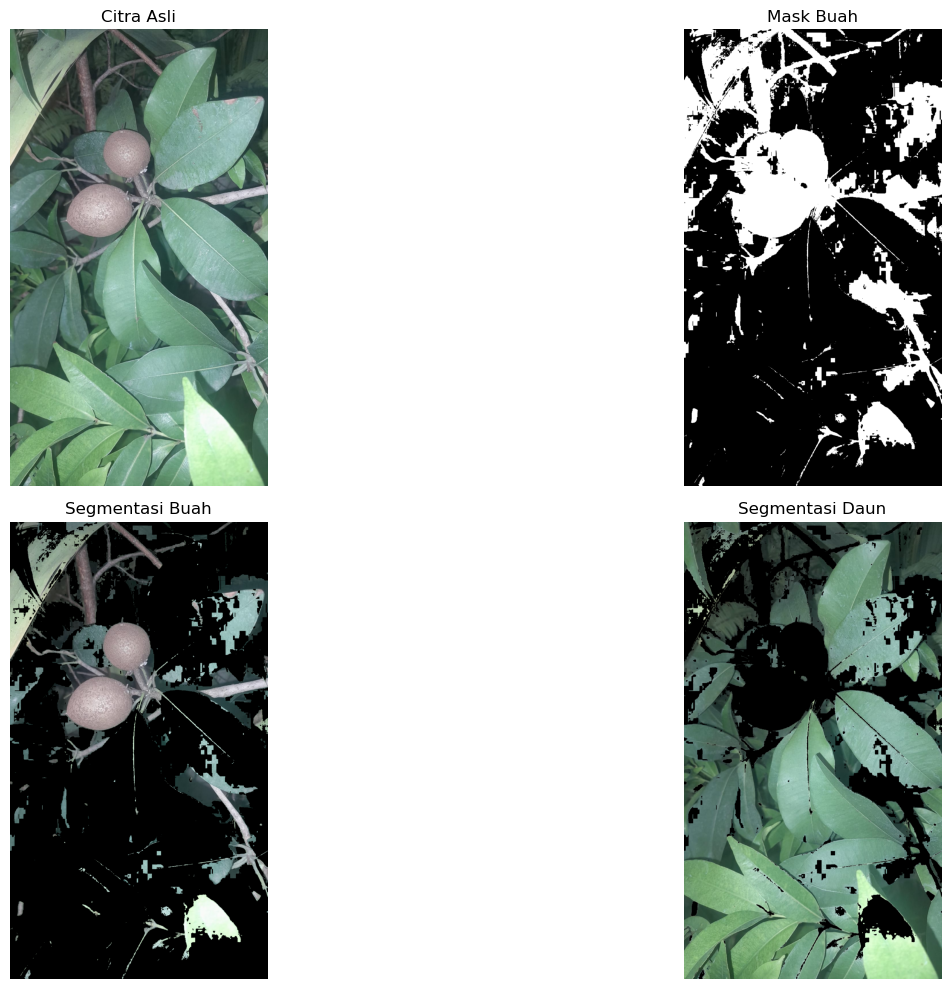

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

axes[0, 0].imshow(img_rgb)
axes[0, 0].set_title("Citra Asli")
axes[0, 0].axis('off')

axes[0, 1].imshow(mask_non_daun, cmap='gray')
axes[0, 1].set_title("Mask Buah")
axes[0, 1].axis('off')

axes[1, 0].imshow(segmentasi_non_daun)
axes[1, 0].set_title('Segmentasi Buah')
axes[1, 0].axis('off')

axes[1, 1].imshow(segmentasi_daun)
axes[1, 1].set_title("Segmentasi Daun")
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()